# Decomposição em autovalores e autovetores : Parte 1 (PCA)

In [30]:
from scipy.io import loadmat
import numpy as np
import seaborn as sns;sns.set_style('darkgrid')
e=loadmat('formantdata.mat')

In [3]:
x_dados=e['D']
media=sum([inst for inst in x_dados])/len(x_dados)
x_dados[:5,]#carregar primeiros dados

array([[-0.68987813,  1.15245681],
       [-0.34945242,  1.59166019],
       [ 0.40143847,  1.01396513],
       [-0.12760464,  1.44015544],
       [-0.93309549,  1.06918102]])

# Normalização

In [4]:
xinorm=np.array([xi-media for xi in x_dados])

In [6]:
variancia=sum([xi**2 for xi in xinorm])/len(xinorm)
variancia

array([0.99777283, 0.99777283])

In [7]:
dp=np.sqrt(variancia)#desvio padrao
xnew=np.array([xinorm[i]/dp for i in range(len(xinorm))])

In [8]:
import matplotlib.pyplot as plt
from numpy.linalg import eig
xnew.shape
xnew[0] # Os dados não se alteraram significativament


array([-0.69064765,  1.15374232])

# Cálculo da matriz de Covariância

$$\Sigma=\frac{1}{m}\displaystyle\sum_{i=1}^{m} x^{(i)}x^{(i)^{T}}$$

In [44]:
#calculo da matriz de covariancia
m=len(xnew)
soma=np.zeros((2,2))
a11,a12,a21,a22=0,0,0,0

for i in range(len(xnew)):#Calculo de cada elemento
    a11+=xnew[i][0]*xnew[i][0]
    a12+=xnew[i][0]*xnew[i][1]
    a21+=xnew[i][0]*xnew[i][1]
    a22+=xnew[i][1]*xnew[i][1]

l=[[a11,a12],[a21,a22]]
cov=np.array(l)/m

print('Matriz de covariância: \n', cov,'\n')#Matriz de covariancia

autovalores=eig(cov)[0]
autovetores=eig(cov)[1]

print('Autovalores: \n', autovalores,'\n')
print('Autovetores: \n',autovetores)

Matriz de covariância: 
 [[ 1.         -0.65422626]
 [-0.65422626  1.        ]] 

Autovalores: 
 [0.34577374 1.65422626] 

Autovetores: 
 [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


# Exibição da plotagem com Autovalores e Autovetores

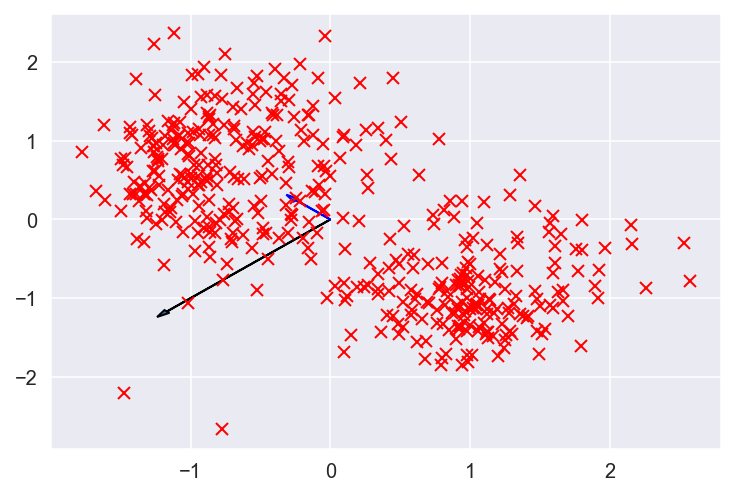

In [42]:
fig,ax=plt.subplots()
plt.plot(xnew[:,0],xnew[:,1],'rx')

#saindo da origem até |lambda|.u_i :

ax.arrow(0,0,autovetores[1][0]*autovalores[1],autovetores[1][1]*autovalores[1], head_width=0.05, head_length=0.1,ec='k')
ax.arrow(0,0,autovetores[0][0]*autovalores[0],autovetores[0][1]*autovalores[0], head_width=0.05, head_length=0.1,ec='b')
plt.show()